In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [212]:
df = pd.read_csv('DSBDALExamDataSets/Graduate/Admission_Predict_Ver1.1.csv')

In [213]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [214]:
duplicates = df.duplicated()

In [215]:
duplicates

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Length: 500, dtype: bool

In [216]:
corr = df.corr()

<Axes: >

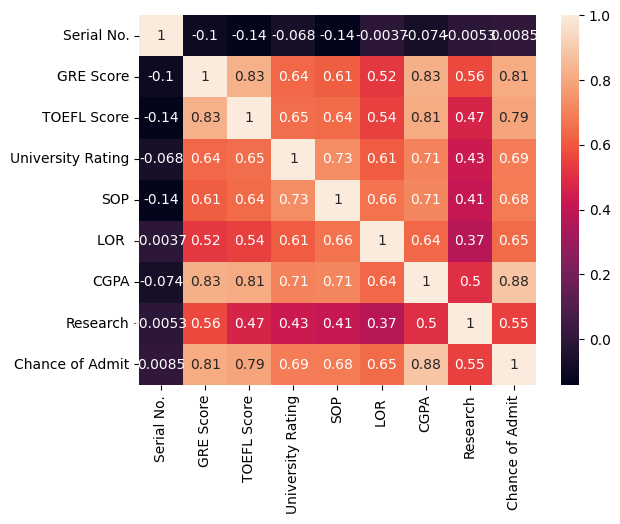

In [217]:
sns.heatmap(corr,annot=True)

In [218]:
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [219]:
from sklearn.model_selection import train_test_split

In [220]:
x=df['CGPA']
y=df['Chance of Admit']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=
                                                 124)
print(x)
print(y)

0      9.65
1      8.87
2      8.00
3      8.67
4      8.21
       ... 
495    9.02
496    9.87
497    9.56
498    8.43
499    9.04
Name: CGPA, Length: 500, dtype: float64
0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64


In [221]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [222]:
x_train

72     9.45
304    8.43
228    8.67
303    8.55
50     8.30
       ... 
450    8.86
135    8.77
17     8.00
156    8.34
462    7.94
Name: CGPA, Length: 375, dtype: float64

In [223]:
y_train

72     0.93
304    0.62
228    0.71
303    0.73
50     0.76
       ... 
450    0.82
135    0.82
17     0.65
156    0.70
462    0.62
Name: Chance of Admit, Length: 375, dtype: float64

In [224]:
x_train = np.array(x_train)
x_train = x_train.reshape(-1,1)
y_train = np.array(y_train)
y_train= y_train.reshape(-1,1)
x_test = np.array(x_test)
x_test = x_test.reshape(-1,1)
y_test = np.array(y_test)
y_test= y_test.reshape(-1,1)

In [225]:
model.fit(x_train,y_train)

LinearRegression()

In [226]:
y_pred=model.predict(x_test)

In [227]:
from sklearn import metrics

print("RMSE :: ",np.sqrt(metrics.mean_squared_error(y_pred,y_test)))
print("MAE :: ",metrics.mean_absolute_error(y_pred,y_test))
print("MSE :: ",metrics.mean_squared_error(y_pred,y_test))
print("R2 :: ",metrics.r2_score(y_pred,y_test))

RMSE ::  0.06629798742074411
MAE ::  0.047569649197590234
MSE ::  0.0043954231360411435
R2 ::  0.699904578217825


In [228]:
import matplotlib.pyplot as plt
import seaborn as sns

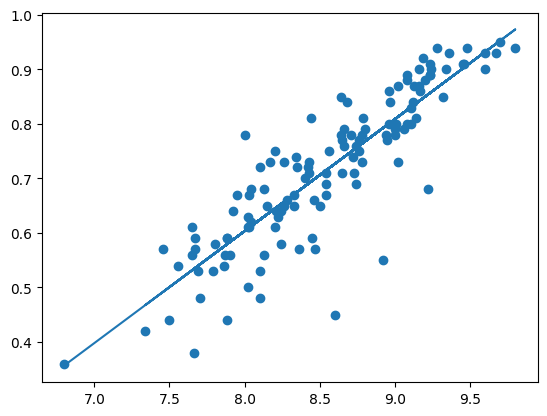

In [229]:
plt.scatter(x_test,y_test)
plt.plot(np.sort(x_test),y_pred)
plt.show()

In [230]:
not_admitted = df[df['Chance of Admit']<0.6]

In [231]:
not_admitted

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45
10,11,325,106,3,3.5,4.0,8.40,1,0.52
15,16,314,105,3,3.5,2.5,8.30,0,0.54
27,28,298,98,2,1.5,2.5,7.50,1,0.44
...,...,...,...,...,...,...,...,...,...
464,465,298,97,2,2.0,3.0,7.21,0,0.45
465,466,305,96,4,3.0,4.5,8.26,0,0.54
475,476,300,101,3,3.5,2.5,7.88,0,0.59
491,492,297,99,4,3.0,3.5,7.81,0,0.54


In [232]:
might_get_admitted = df[df['Chance of Admit']>0.6]

In [233]:
might_get_admitted = might_get_admitted[might_get_admitted['Chance of Admit']<0.85]

In [234]:
might_get_admitted

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
6,7,321,109,3,3.0,4.0,8.20,1,0.75
...,...,...,...,...,...,...,...,...,...
490,491,307,105,2,2.5,4.5,8.12,1,0.67
493,494,300,95,2,3.0,1.5,8.22,1,0.62
494,495,301,99,3,2.5,2.0,8.45,1,0.68
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [235]:
admitted = df[df['Chance of Admit']>0.85]

In [236]:
admitted

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
5,6,330,115,5,4.5,3.0,9.34,1,0.90
22,23,328,116,5,5.0,5.0,9.50,1,0.94
23,24,334,119,5,5.0,4.5,9.70,1,0.95
24,25,336,119,5,4.0,3.5,9.80,1,0.97
...,...,...,...,...,...,...,...,...,...
470,471,320,110,5,4.0,4.0,9.27,1,0.87
472,473,327,116,4,4.0,4.5,9.48,1,0.90
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96


In [237]:
research = df[df['Research']==1]

In [238]:
no_research = df[df['Research']==0]

In [239]:
print(research.shape)
print(no_research.shape)

(280, 9)
(220, 9)


In [240]:
merge_set = pd.merge(research,no_research,how='outer')

In [241]:
merge_set

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,6,330,115,5,4.5,3.0,9.34,1,0.90
...,...,...,...,...,...,...,...,...,...
495,488,327,115,4,3.5,4.0,9.14,0,0.79
496,490,302,110,3,4.0,4.5,8.50,0,0.65
497,492,297,99,4,3.0,3.5,7.81,0,0.54
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [242]:
sort_set = df.sort_values(['GRE Score','TOEFL Score','University Rating'],ascending=[False,False,False])


In [243]:
sort_set

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
25,26,340,120,5,4.5,4.5,9.60,1,0.94
202,203,340,120,5,4.5,4.5,9.91,1,0.97
81,82,340,120,4,5.0,5.0,9.50,1,0.96
143,144,340,120,4,4.5,4.0,9.92,1,0.97
84,85,340,115,5,4.5,4.5,9.45,1,0.94
...,...,...,...,...,...,...,...,...,...
272,273,294,95,1,1.5,1.5,7.64,0,0.49
79,80,294,93,1,1.5,2.0,7.36,0,0.46
168,169,293,97,2,2.0,4.0,7.80,1,0.64
117,118,290,104,4,2.0,2.5,7.46,0,0.45


In [244]:
transpose_set = df.transpose()

In [245]:
transpose_set

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
Serial No.,1.00,2.00,3.00,4.00,5.00,6.00,7.00,8.00,9.0,10.00,...,491.00,492.00,493.00,494.00,495.00,496.00,497.00,498.00,499.00,500.00
GRE Score,337.00,324.00,316.00,322.00,314.00,330.00,321.00,308.00,302.0,323.00,...,307.00,297.00,298.00,300.00,301.00,332.00,337.00,330.00,312.00,327.00
TOEFL Score,118.00,107.00,104.00,110.00,103.00,115.00,109.00,101.00,102.0,108.00,...,105.00,99.00,101.00,95.00,99.00,108.00,117.00,120.00,103.00,113.00
University Rating,4.00,4.00,3.00,3.00,2.00,5.00,3.00,2.00,1.0,3.00,...,2.00,4.00,4.00,2.00,3.00,5.00,5.00,5.00,4.00,4.00
SOP,4.50,4.00,3.00,3.50,2.00,4.50,3.00,3.00,2.0,3.50,...,2.50,3.00,2.50,3.00,2.50,4.50,5.00,4.50,4.00,4.50
LOR,4.50,4.50,3.50,2.50,3.00,3.00,4.00,4.00,1.5,3.00,...,4.50,3.50,4.50,1.50,2.00,4.00,5.00,5.00,5.00,4.50
CGPA,9.65,8.87,8.00,8.67,8.21,9.34,8.20,7.90,8.0,8.60,...,8.12,7.81,7.69,8.22,8.45,9.02,9.87,9.56,8.43,9.04
Research,1.00,1.00,1.00,1.00,0.00,1.00,1.00,0.00,0.0,0.00,...,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00
Chance of Admit,0.92,0.76,0.72,0.80,0.65,0.90,0.75,0.68,0.5,0.45,...,0.67,0.54,0.53,0.62,0.68,0.87,0.96,0.93,0.73,0.84


In [251]:
melt_set = df.melt(id_vars=['Chance of Admit','Serial No.'])

In [252]:
melt_set

,Chance of Admit,Serial No.,variable,value
0,0.92,1,GRE Score,337.0
1,0.76,2,GRE Score,324.0
2,0.72,3,GRE Score,316.0
3,0.80,4,GRE Score,322.0
4,0.65,5,GRE Score,314.0
...,...,...,...,...
3495,0.87,496,Research,1.0
3496,0.96,497,Research,1.0
3497,0.93,498,Research,1.0
3498,0.73,499,Research,0.0


In [253]:
wide_set = melt_set.pivot_table(index =['Chance of Admit'])

C:\Users\rajma\AppData\Local\Temp\ipykernel_1572\2755547068.py:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  wide_set = melt_set.pivot_table(index =['Chance of Admit'])


In [254]:
wide_set

,Serial No.,value
Chance of Admit,,
0.34,235.000000,58.568571
0.36,77.000000,59.282857
0.37,458.000000,58.010000
0.38,234.000000,59.594286
0.39,375.000000,62.021429
...,...,...
0.93,268.833333,67.199167
0.94,160.846154,67.977253
0.95,288.000000,68.348571
